<a href="https://colab.research.google.com/github/Priyabrata111/Priyabrata_Mondal/blob/master/s1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pydot
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
train_dir= '/content/drive/My Drive/basedata/training'
validation_dir='/content/drive/My Drive/basedata/validation'
test_dir='/content/drive/My Drive/basedata/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen =ImageDataGenerator( rescale=1./255)
test_datagen =ImageDataGenerator( rescale=1./255)

train_generator= train_datagen.flow_from_directory(train_dir , target_size=(150,150),batch_size=20, class_mode='binary')



validation_generator= test_datagen.flow_from_directory(validation_dir , target_size=(150,150),batch_size=20, class_mode='binary')





Found 1714 images belonging to 2 classes.
Found 94 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512,activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from tensorflow import optimizers


model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=["acc"])

In [ ]:
history= model.fit_generator(train_generator, steps_per_epoch=86,epochs=20,validation_data=validation_generator,validation_steps=5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
86/86 [==============================] - 103s 1s/step - loss: 0.1267 - acc: 0.9562 - val_loss: 0.1971 - val_acc: 0.9362
Epoch 2/20
86/86 [==============================] - 78s 911ms/step - loss: 0.0733 - acc: 0.9802 - val_loss: 0.0725 - val_acc: 0.9681
Epoch 3/20
86/86 [==============================] - 78s 910ms/step - loss: 0.0552 - acc: 0.9837 - val_loss: 0.0306 - val_acc: 0.9894
Epoch 4/20
86/86 [==============================] - 78s 909ms/step - loss: 0.0463 - acc: 0.9866 - val_loss: 0.0644 - val_acc: 0.9681
Epoch 5/20
86/86 [==============================] - 78s 909ms/step - loss: 0.0417 - acc: 0.9883 - val_loss: 0.0260 - val_acc: 0.9894
Epoch 6/20
86/86 [==============================] - 78s 911ms/step - loss: 0.0328 - acc: 0.9901 - val_loss: 0.0119 - val_acc: 1.0000
Epoch 7/20
86/86 [==============================] - 78s 911ms/step - loss: 0.0365 - acc: 0.9877 - val_loss: 0.0240 - val_acc: 1.0000
Epoch 8/20
86/86 [==============================] - 78s 907ms/step - lo

<function matplotlib.pyplot.show>

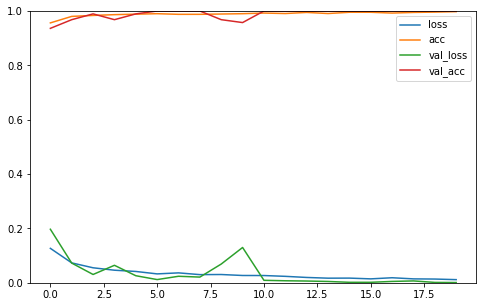

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid= (True)
plt.gca().set_ylim(0,1)
plt.show

In [ ]:
model.save("model.1st")

INFO:tensorflow:Assets written to: model.1st/assets


In [ ]:
import cv2
import os,sys
from tensorflow.keras.preprocessing import image

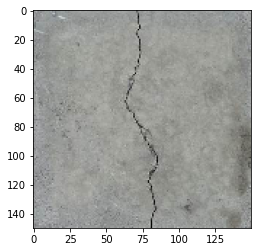

This is a defective piece


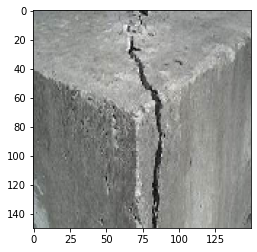

This is a defective piece


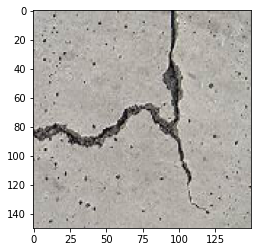

This is a defective piece


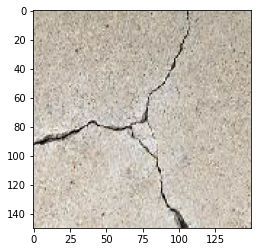

This is a defective piece


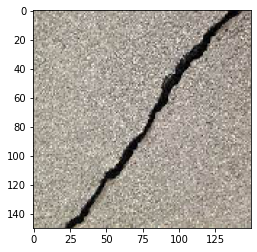

This is a defective piece


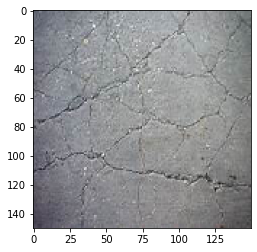

This a non defective piece


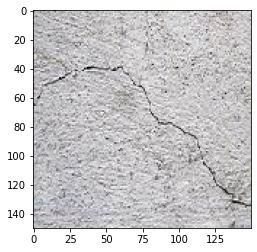

This a non defective piece


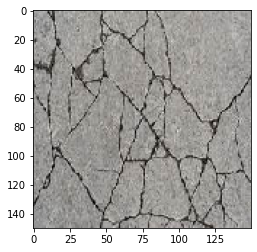

This is a defective piece


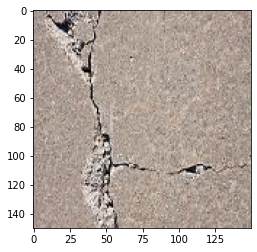

This a non defective piece


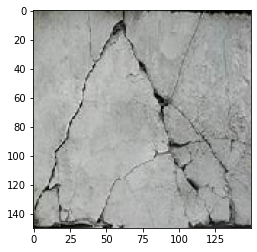

This a non defective piece


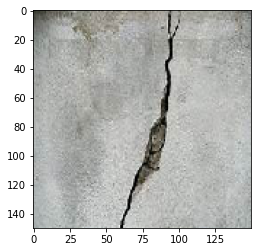

This is a defective piece


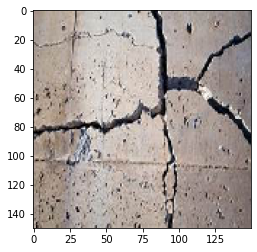

This is a defective piece


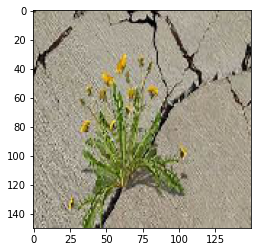

This is a defective piece


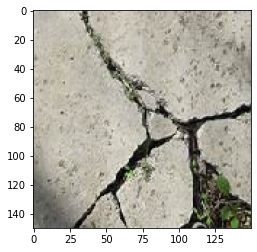

This is a defective piece


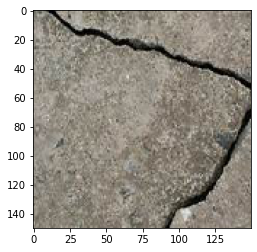

This a non defective piece


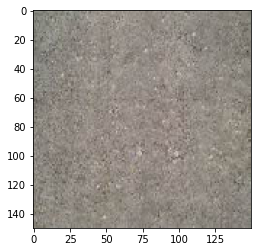

This a non defective piece


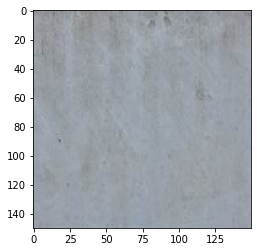

This a non defective piece


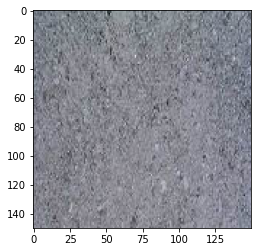

This a non defective piece


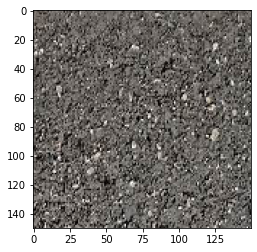

This a non defective piece


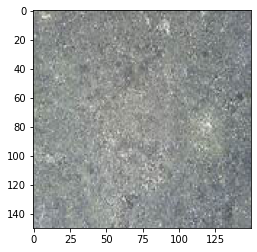

This a non defective piece


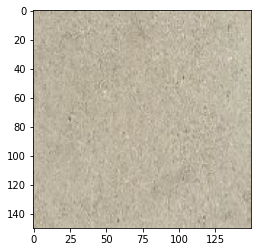

This a non defective piece


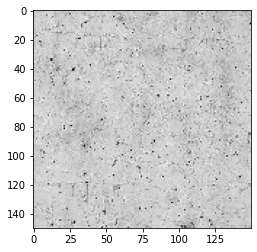

This a non defective piece


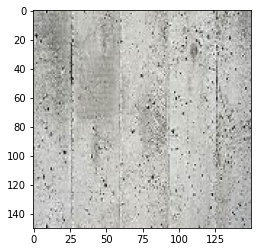

This a non defective piece


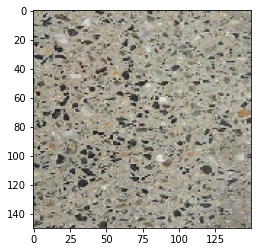

This a non defective piece


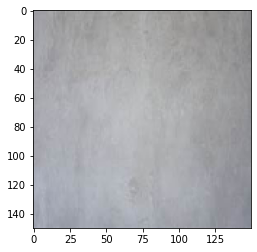

This a non defective piece


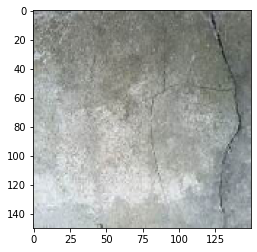

This a non defective piece


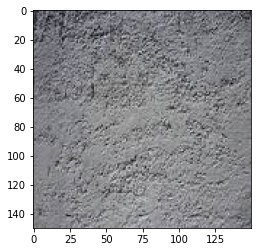

This a non defective piece


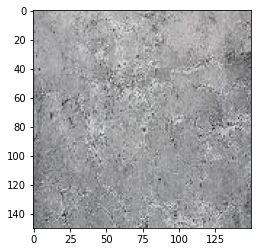

This is a defective piece


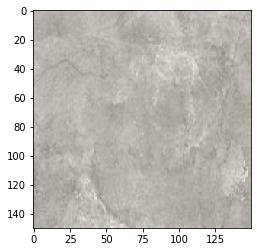

This a non defective piece


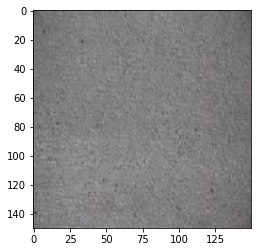

This a non defective piece


In [ ]:

dir_path = '/content/drive/My Drive/basedata/testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i,target_size=(150,150))
    plt.imshow(img)
    plt.show()
    X= image.img_to_array(img)
    
    X= np.expand_dims(X,axis=0)
    
    photos = np.vstack([X])
    val=model.predict(photos)
    
    if val==0:
      print('This is a defective piece')
    else:
      print('This a non defective piece')





  